# Mega-Sena Analyse

A Mega-Sena é uma das maiores modalidades de jogos de loteria do Brasil. O sorteio é realizado pelo menos duas vezes na semana,
além de haver o prêmio principal, o qual o apostador que acertar 6 (seis) números pode levar para casa milhões de reais, o apostador ainda pode receber quantias menores, acertando 4 (quatro) ou 5 (cinco) dezenas.

Os números da aposta, chamado popularmente de jogo, pode ser formado tanto pelo jogador, quanto por um sistema, o qual gera números aleatórios, chamado de "Surpresinha".

O prêmio corresponde a 45,3% da arrecadação do sorteio. Dessa porcentagem ocorre a seguinte distribuição:
                - 35% são distribuídos entre o(s) acertador(es) da Sena, 
                - 19% da Quina e
                - 19% da Quadra,
                - 22% são distribuídos nos concursos de final 0 e 5,
                - 5% para os últimos concursos do ano de final 0 ou 5, 
                - e outra parte do valor é repassado para o Governo Federal.
                
Caso não haja vencedor, o prêmio é acumulado para o próximo sorteio. Enquanto caso haja vencedor e não ele busque o valor em 90 dias do sorteio, o valor é repassado ao tesouro nacional para aplicação no FIES - Fundo de Financiamento ao Estudante do Ensino Superior.

A seguir analisemos os dados da Mega-Sena, de 03/1996 a 03/2018.

Os dados são apresentados com as seguintes colunas:
    1. id
    2. Concurso
    3. Dezena1
    4. Dezena2
    5. Dezena3
    6. Dezena4
    7. Dezena5
    8. Dezena6
    9. Arrecadação Total
    10. Ganhadores da Sena
    11. Rateio da Sena
    12. Ganhadores da Quina
    13. Rateio da Quina
    14. Ganhadores da Quadra
    15. Rateio da Quadra
    16. Acumulação
    17. Valor Acumulado
    18. Estimativa do Prêmio
    
A seguir é apresentada uma tabela com os 5 primeiros concursos realizados.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
arquivo = 'basedados.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)
dados.head()

['MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


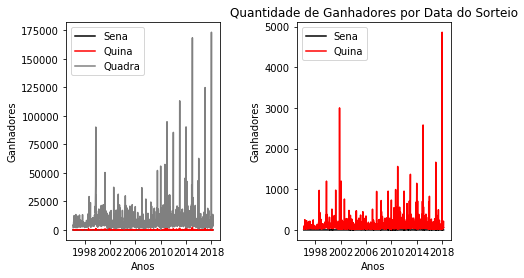

In [74]:
%matplotlib inline
cols = ['Data Sorteio', 'Ganhadores_Sena', 'Ganhadores_Quina', 'Ganhadores_Quadra']
ganhadores_pano = dados[cols]

cols1 = ['Data Sorteio', 'Rateio_Sena', 'Rateio_Quina', 'Rateio_Quadra']
rateios = dados[cols1]

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True);

axes[0].plot(ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Sena'], c='black', label= 'Sena')
axes[0].plot(ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Quina'], c='red', label= 'Quina' )
axes[0].plot(ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Quadra'], c='grey', label= 'Quadra' )
axes[0].legend(loc='upper left')
axes[0].set_xlabel('Anos');
axes[0].set_ylabel('Ganhadores');

plt.title('Quantidade de Ganhadores por Data do Sorteio')

axes[1].plot( ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Sena'], c='black', label= 'Sena' )
axes[1].plot( ganhadores_pano['Data Sorteio'], ganhadores_pano['Ganhadores_Quina'], c='red', label= 'Quina' )
axes[1].legend(loc='upper left')
axes[1].set_xlabel('Anos');
axes[1].set_ylabel('Ganhadores');

plt.subplots_adjust( wspace = 0.5 , left = 0.01)



No gráfico, Quantidade de Ganhadores por Tipo de Sorteio, a esquerda é possível comparar os tipos de modalidades de sorteio em quantidade de ganhadores por ano. Claramente é possível perceber que para uma pessoa ser ganhadora na *Quadra* é muito mais fácil do que na *Sena* e na *Quina* atualmente. Enquanto na direita é possível perceber que entre a *Sena* e a *Quina*, a quantidade de vencedores ainda é bem superior a *Sena* com o passar dos anos.

Suponha que um cientista descobriu a viagem no tempo e foi atrás de um analista de dados para saber qual foi o ano que teve mais ganhadores na Quina, pois ele queria jogar durante o ano todos os jogos, já que ele achava a Sena muito difícil. Então, o analista dise que ele deveria voltar para 2017, porque foi o ano em que teve maior número de ganhadores, o qual ele poderia ser um deles. E o cientista não precisava se garantir apenas na Quina já que no mesmo período, a Quadra se mostrava com a maior quantidade de jogadores dos 3 sorteios possíveis. 

Além da quantidade de ganhadores, é possível analisar que durante o período de 2002 e 2010, tanto a Quina quanto a Quarta apresentaram queda na quantidade de ganhadores.

C:\Users\Henrique\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


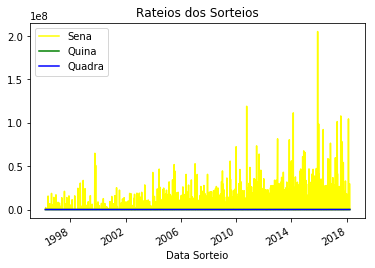

In [78]:
%matplotlib inline
rateios.plot(kind='line',x='Data Sorteio',y=['Rateio_Sena', 'Rateio_Quina', 'Rateio_Quadra'], title='Rateios dos Sorteios', color=['yellow','green', 'blue']).\
            legend(loc='best',labels=['Sena','Quina','Quadra'])

A Mega-Sena é o sorteio com maior valor de rasteio em comparação com a Quina e a Quadra como é possível analisar pelo gráfico gerado acima. É possível analisar que o rasteio vem crescendo a cada ano, porém a partir de 2011 a Sena começou a apresentar rasteio máximo aproximadamente constantes em comparações com os anos posteriores e que em 2016 foi o ano em que a Mega-Sena obteve o maior valor de rasteio, no qual, caso realizemos a média dos valores dos períodos de 2011 em diante, o ano de 2016 irá contribuir com o aumento da média, não retratanto bem o valor de rasteio médio da Sena.